In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [7]:
#Read the data
car = pd.read_csv("ToyotaCorolla.csv", encoding= 'unicode_escape')
car.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [15]:
data = car[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [16]:
data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [17]:
data.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [19]:
data.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

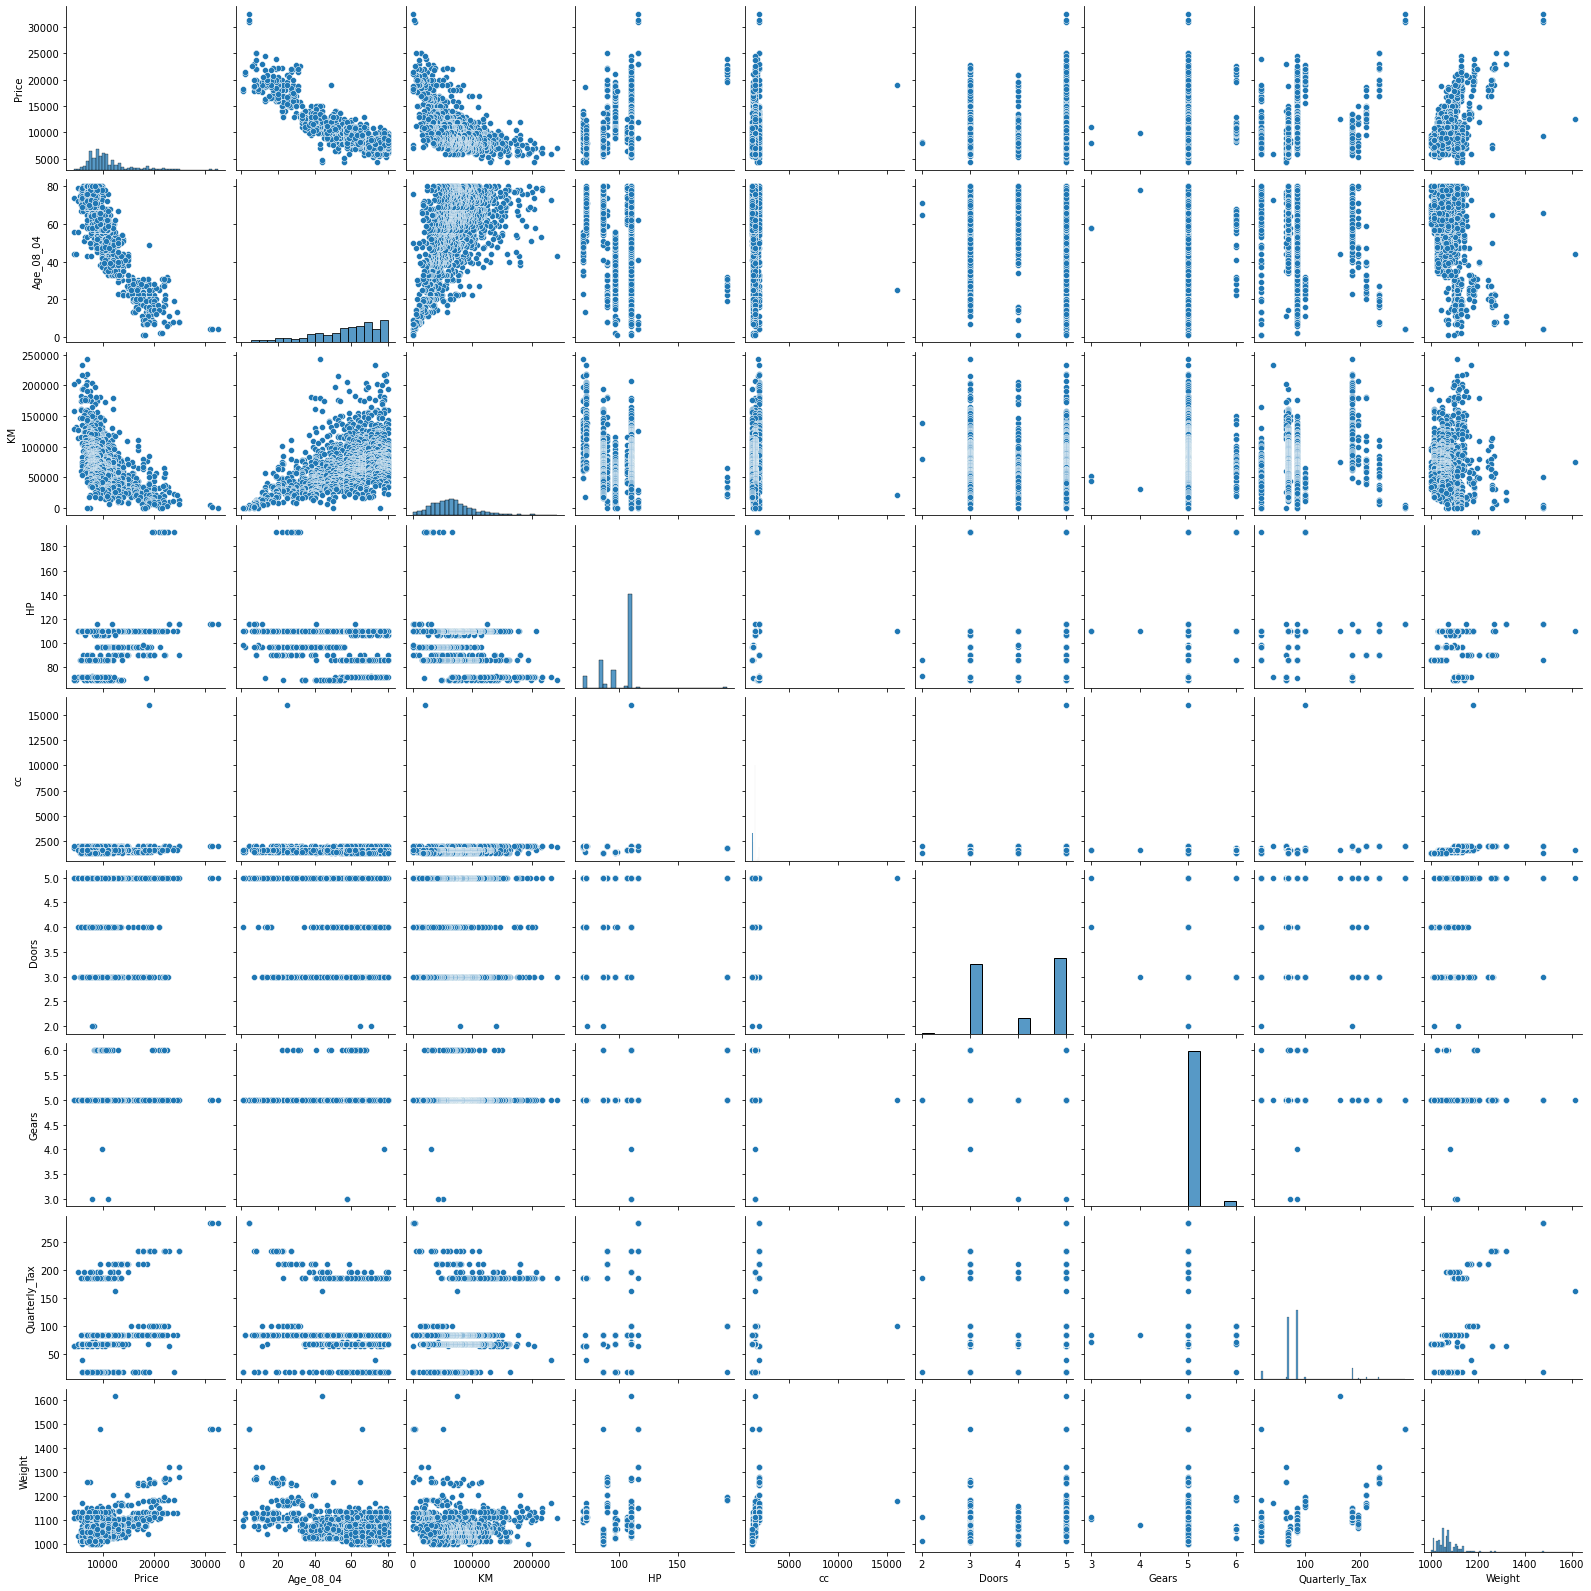

In [20]:
sns.pairplot(data)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


# prepairing model

In [81]:
model = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data = data).fit()

In [82]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Mon, 17 Jan 2022   Prob (F-statistic):               0.00
Time:                        23:24:15   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
#Doors and cc have p value > 0.05 so they are insignificunt for us


In [46]:
ml_cc = smf.ols("Price~cc", data = data).fit()
ml_cc.summary() # Pvalue = 0.000 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Mon, 17 Jan 2022   Prob (F-statistic):           1.55e-06
Time:                        22:46:06   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
ml_Doors = smf.ols("Price~Doors",data = data).fit()
ml_Doors.summary() #Pvalue = 0.000 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Mon, 17 Jan 2022   Prob (F-statistic):           1.46e-12
Time:                        22:47:41   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
ml_cc_Doors = smf.ols("Price~cc+Doors",data = data).fit()
ml_cc_Doors.summary() #Pvalue = 0.000 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     35.24
Date:                Mon, 17 Jan 2022   Prob (F-statistic):           1.15e-15
Time:                        22:48:52   Log-Likelihood:                -13772.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6509.4211    515.773     12.621      0.000    5497.670    7521.173
cc             0.9597      0.221      4.340      0.000       0.526       1.393
Doors        671.3973     98.501      6.816      0.000     478.176     864.619
==============================================================================
Omnibus:                      448.845   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.854
Skew:                           1.603   Prob(JB):                    6.70e-282
Kurtosis:                       6.370   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Calculate VIf

In [73]:
rsq_Age_08_04 = smf.ols("Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data = data).fit().rsquared
vif_Age_08_04 = 1/(1-rsq_Age_08_04) #1.8846198056602868

rsq_KM = smf.ols("KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data = data).fit().rsquared
vif_KM = 1/(1-rsq_KM)  #1.7569047782042881

rsq_HP = smf.ols("HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight",data = data).fit().rsquared
vif_HP = 1/(1-rsq_HP)  #1.4194221086310974

rsq_cc = smf.ols("cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight",data = data).fit().rsquared
vif_cc = 1/(1-rsq_cc)  #1.1638939849423797

rsq_Doors = smf.ols("Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight",data = data).fit().rsquared
vif_Doors = 1/(1-rsq_Doors) #1.156575207076043

rsq_Gears = smf.ols("Gears~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight",data = data).fit().rsquared
vif_Gears = 1/(1-rsq_Gears) #1.098723019347037

rsq_Quarterly_Tax = smf.ols("Quarterly_Tax~Age_08_04+KM+HP+cc+Doors+Gears+Weight",data = data).fit().rsquared
vif_Quarterly_Tax = 1/(1-rsq_Quarterly_Tax) #2.311430811531038

rsq_Weight = smf.ols("Weight~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax",data = data).fit().rsquared
vif_Weight = 1/(1-rsq_Weight) #2.516419837445868


# Storing vif values in a data frame
d1 = {'Variables':["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"],'VIF':[vif_Age_08_04,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_Quarterly_Tax,vif_Weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

# Waight has higher vif value

,Variables,VIF
0,Age_08_04,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Quarterly_Tax,2.311431
7,Weight,2.516420


In [74]:
data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


# Residual Analysis

## Test for Normality of Residuals (Q-Q Plot)

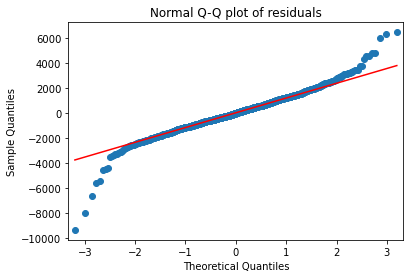

In [83]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [84]:
list(np.where(model.resid>4000))

[array([ 109,  110,  111,  125,  147,  171,  523, 1058], dtype=int64)]

## Residual Plot for Homoscedasticity

In [85]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

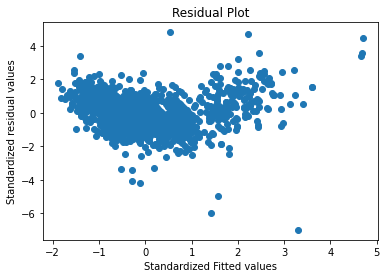

In [86]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual Vs Regressors

eval_env: 1


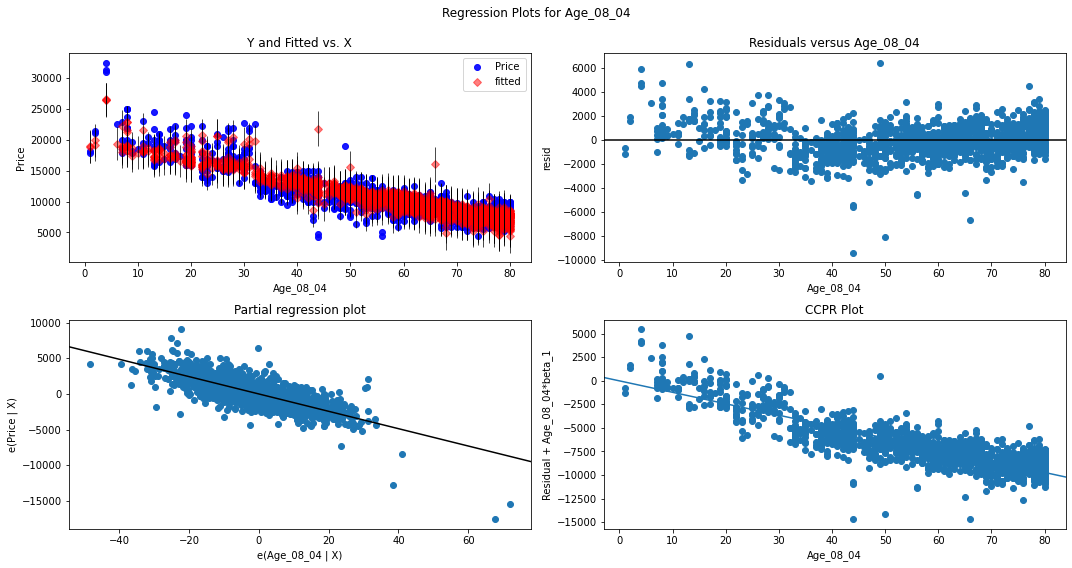

In [91]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age_08_04", fig=fig)
plt.show()

eval_env: 1


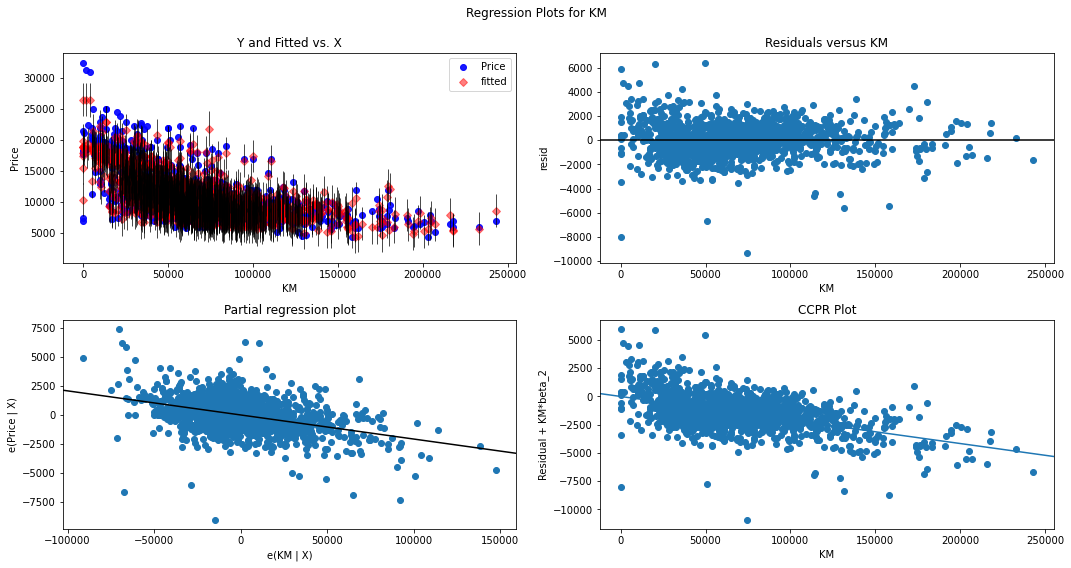

In [103]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

eval_env: 1


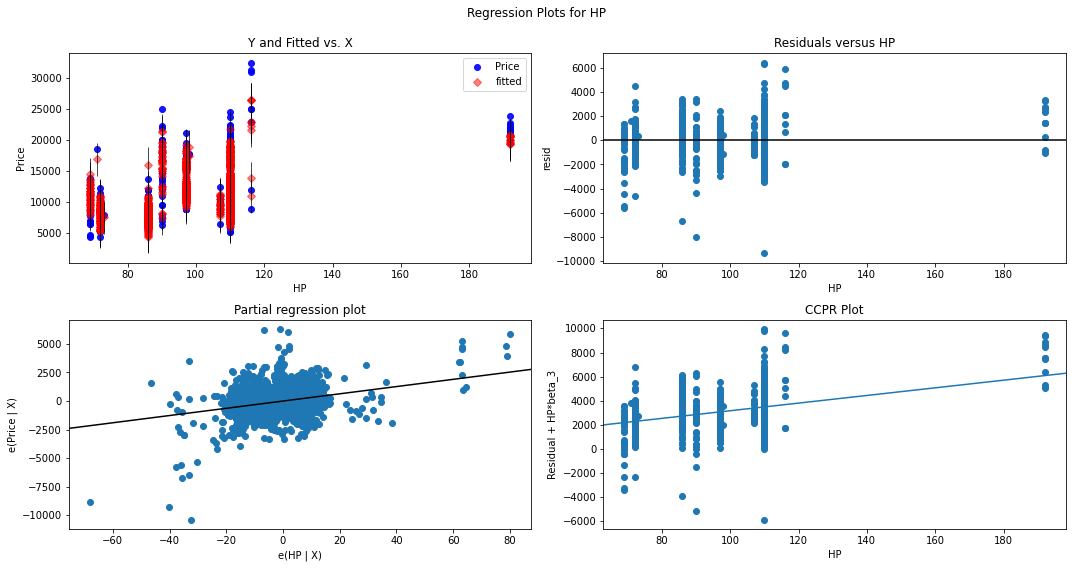

In [104]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

eval_env: 1


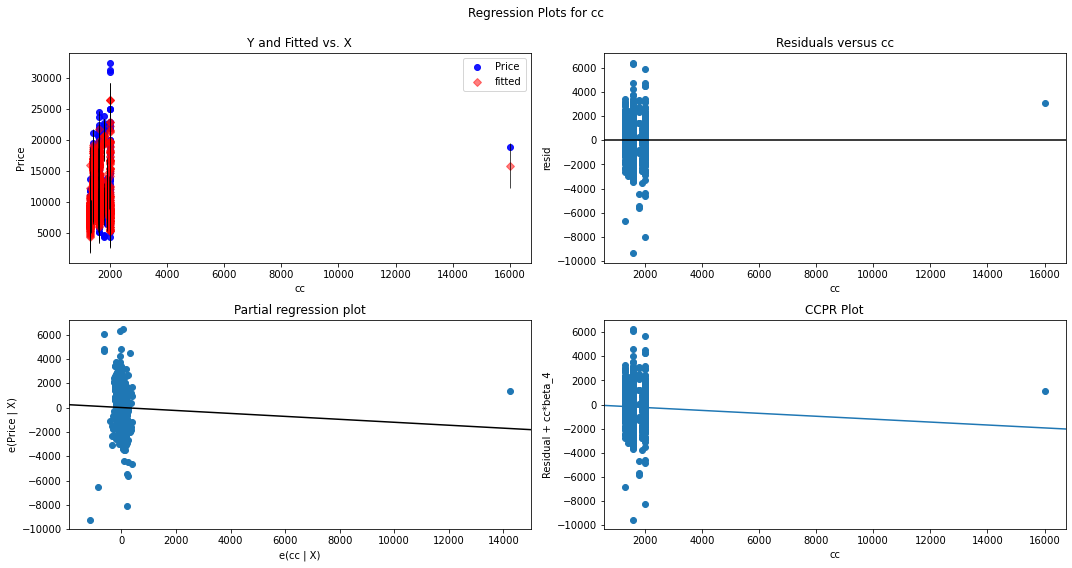

In [105]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

eval_env: 1


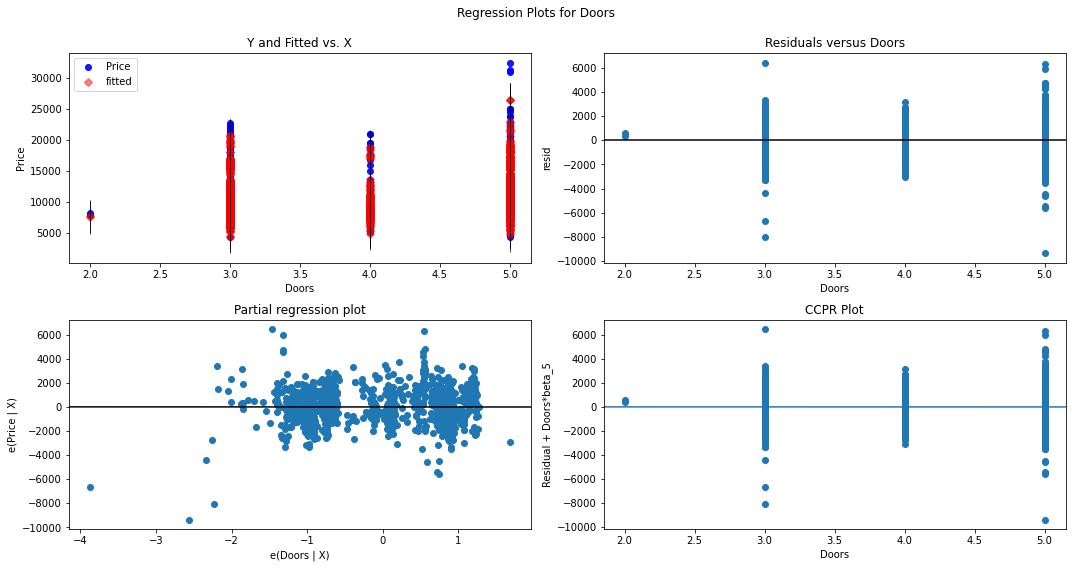

In [106]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

eval_env: 1


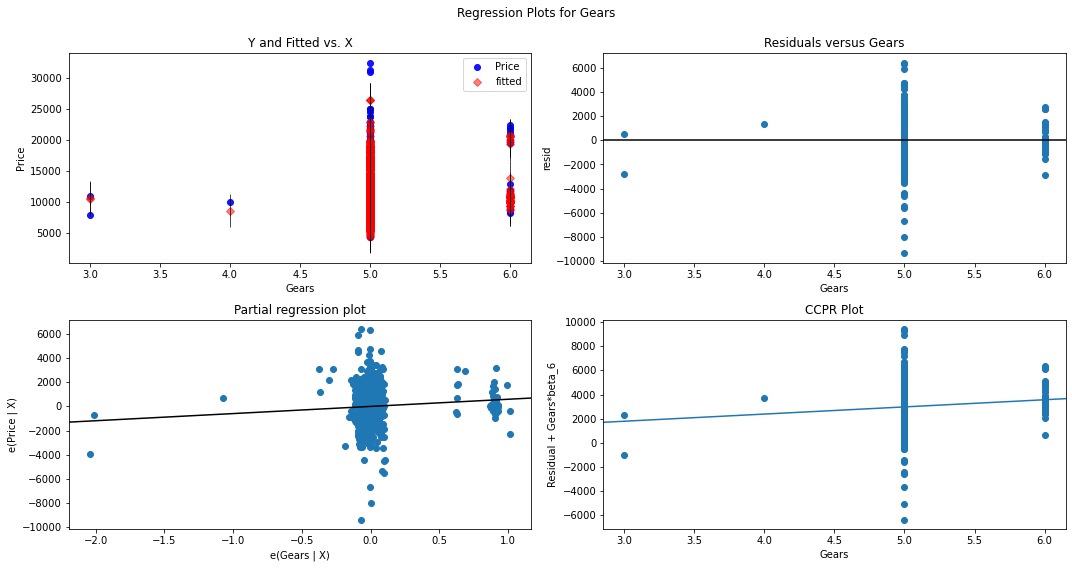

In [107]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

eval_env: 1


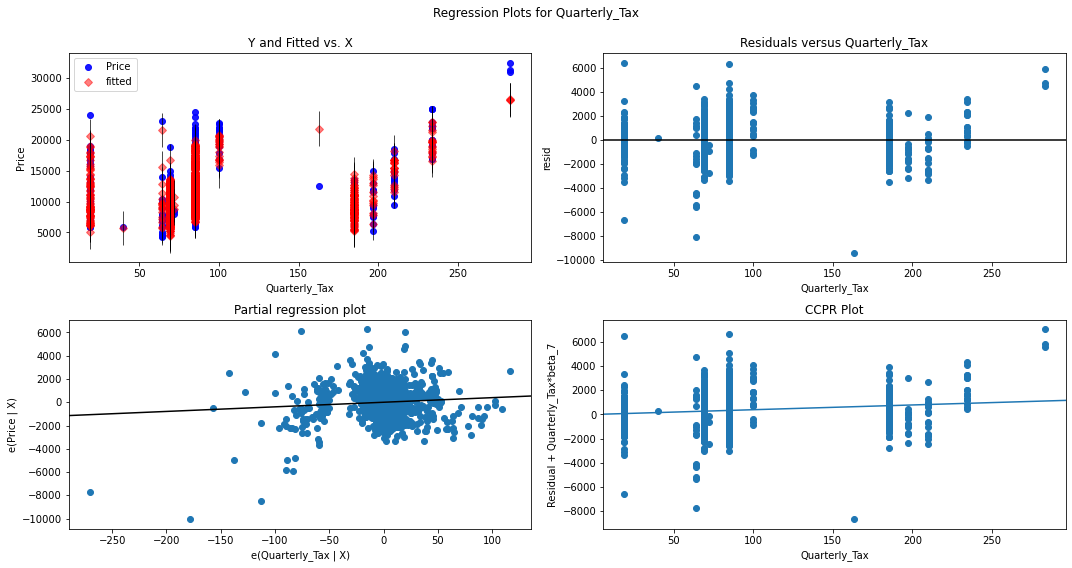

In [108]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Quarterly_Tax", fig=fig)
plt.show()

eval_env: 1


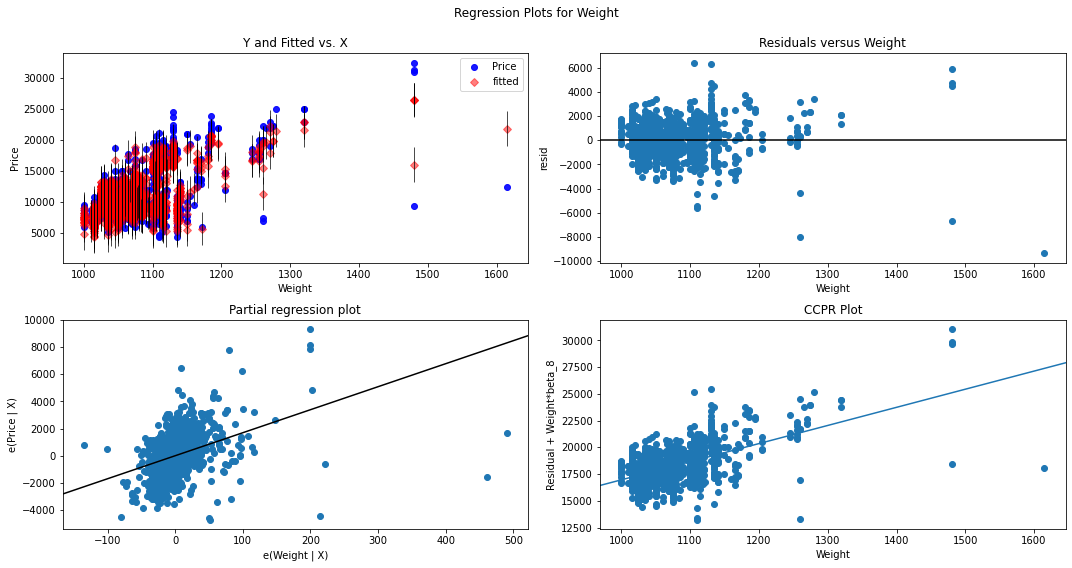

In [109]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

# Model Deletion Diagnostics

##  Detecting Influencers/Outliers

## Cook’s Distance

In [110]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

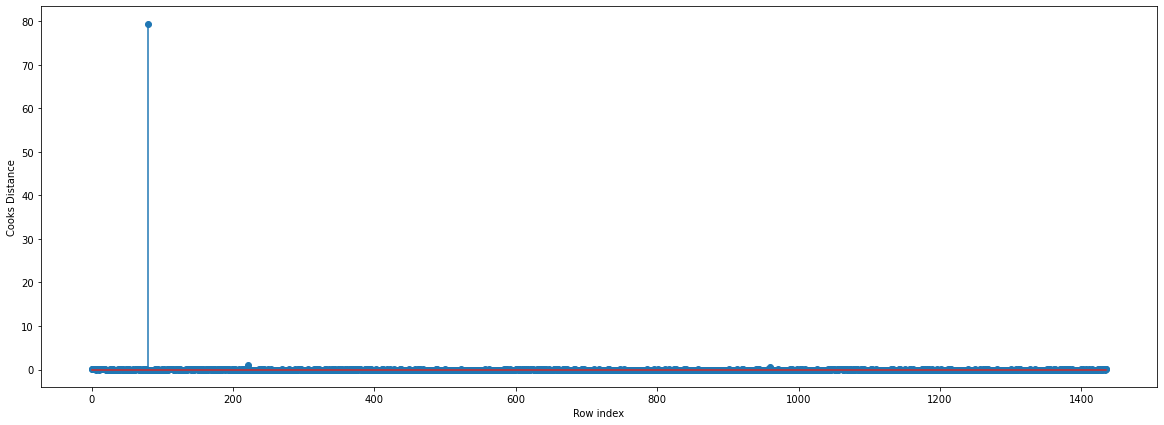

In [111]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [112]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 79.52010624138181)

## High Influence points

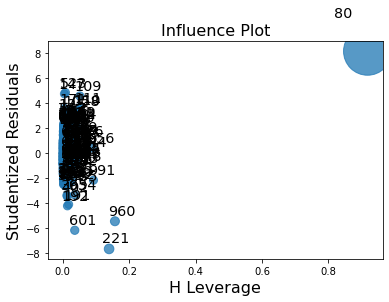

In [113]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [114]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [115]:
leverage_cutoff

0.020891364902506964

#### From the above plot, it is evident that data point 80 is the influencers

In [117]:
data[data.index.isin([80])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [118]:
data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [119]:
#Discard the data points which are influencers and reasign the row number (reset_index())
data1=data.drop(data.index[[80]],axis=0).reset_index()

In [123]:
#Drop the original index
data1=data1.drop(['index'],axis=1)

In [124]:
data1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


# Build model

In [127]:
#Exclude variable "Waight" and generate R-Squared and AIC values
model2 = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax", data = data1).fit()

In [128]:
(model2.rsquared,model2.aic)

(0.8394508024403655, 24981.322667036107)

In [134]:
#Exclude variable "Quarterly_Tax" and generate R-Squared and AIC values
model3 = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Weight", data = data1).fit()

In [135]:
(model3.rsquared,model3.aic)

(0.8656883979875688, 24725.264231919595)

# Cooks Distance

In [136]:
model_influance_V = model3.get_influence()
(c_V, _) = model_influance_V.cooks_distance

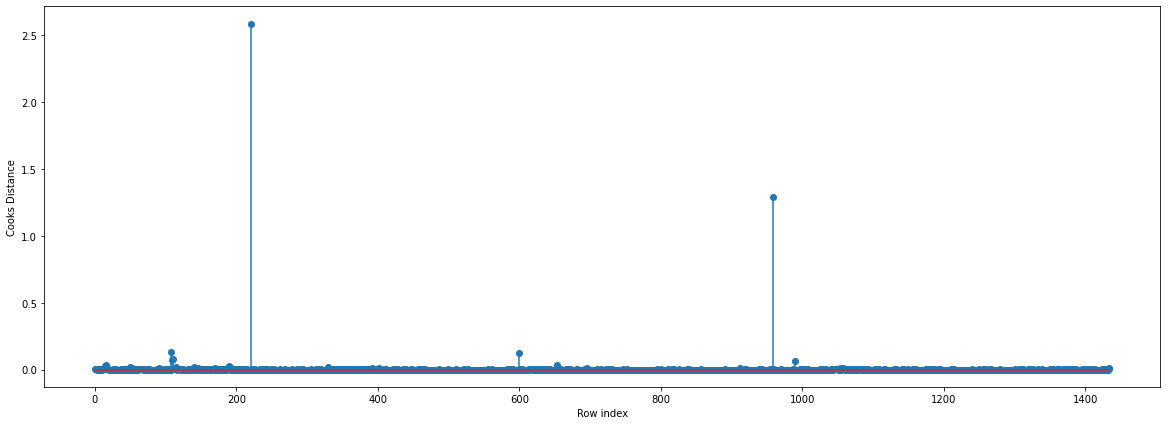

In [137]:
# Plot the influances values using steam plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data1)), np.round(c_V, 3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [138]:
(np.argmax(c_V), np.max(c_V))

(220, 2.585431186189713)

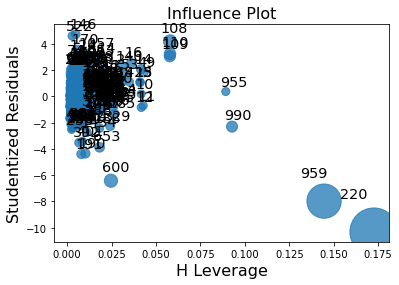

In [139]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model3)
plt.show()

In [140]:
data1[data1.index.isin([220,995,959,990])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
220,12450,44,74172,110,1600,5,5,163,1615
959,9390,66,50806,86,1300,3,5,19,1480
990,7950,58,43000,110,1600,4,3,72,1114
995,9950,67,42102,110,1600,5,5,85,1075


# Improving The Model

In [141]:
# Discard or drop the points which are influancers and reasign the row number (reset index())
data2 = data1.drop(data1.index[[220,995,959,990]],axis=0).reset_index()

In [144]:
#Drop the original index
data2=data2.drop(['index'],axis=1)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [147]:
#Exclude variable "Waight" and generate R-Squared and AIC values
model4 = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax", data = data2).fit()

In [148]:
(model4.rsquared,model4.aic)

(0.8398500098498799, 24911.170275027238)

In [149]:
#Exclude variable "Quarterly_Tax" and generate R-Squared and AIC values
model5 = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Weight", data = data2).fit()

In [150]:
model5.rsquared,model5.aic

(0.8846845073364402, 24441.174025937664)

# Cooks Distance

In [151]:
model_influance_V = model5.get_influence()
(c_V, _) = model_influance_V.cooks_distance

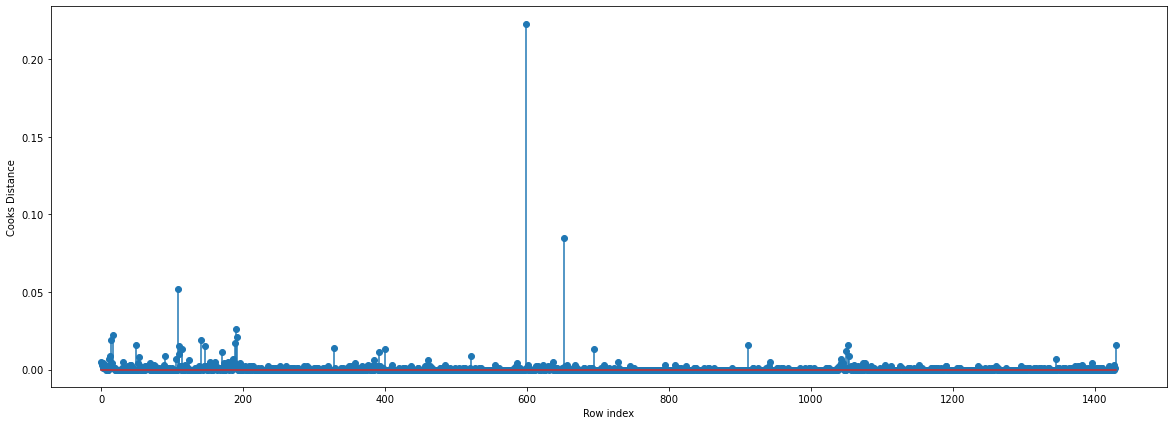

In [152]:
# Plot the influances values using steam plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data2)), np.round(c_V, 3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [154]:
(np.argmax(c_V), np.max(c_V))

(599, 0.22342251120589462)

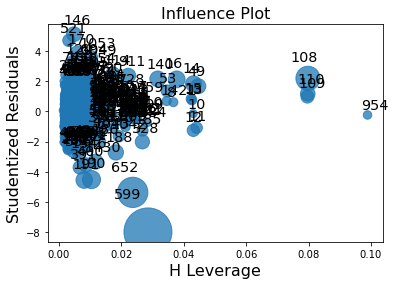

In [153]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model5)
plt.show()

In [155]:
data2[data2.index.isin([599,108,119,109,954])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
108,32500,4,1,116,2000,5,5,283,1480
109,31000,4,4000,116,2000,5,5,283,1480
119,18950,13,57037,110,1600,5,5,85,1115
599,7500,50,1,90,2000,3,5,64,1260
954,10950,58,51421,110,1600,5,3,85,1105


In [157]:
data3 = data2.drop(data2.index[[599,108,119,109,954]], axis=0)
#Drop the original index


In [163]:
data3.reset_index()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1426,7500,69,20544,86,1300,3,5,69,1025
1427,10845,72,19000,86,1300,3,5,69,1015
1428,8500,71,17016,86,1300,3,5,69,1015
1429,7250,70,16916,86,1300,3,5,69,1015


In [164]:
data3=data3.drop(['index'],axis=1)

# Improving model

In [165]:
#Exclude variable "Quarterly_Tax" and generate R-Squared and AIC values
model6 = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Weight", data = data3).fit()

In [166]:
model6.rsquared,model6.aic

(0.884201685099133, 24291.650476833307)

In [168]:
# Cooks distance
model_influance_V = model6.get_influence()
(c_V, _) = model_influance_V.cooks_distance

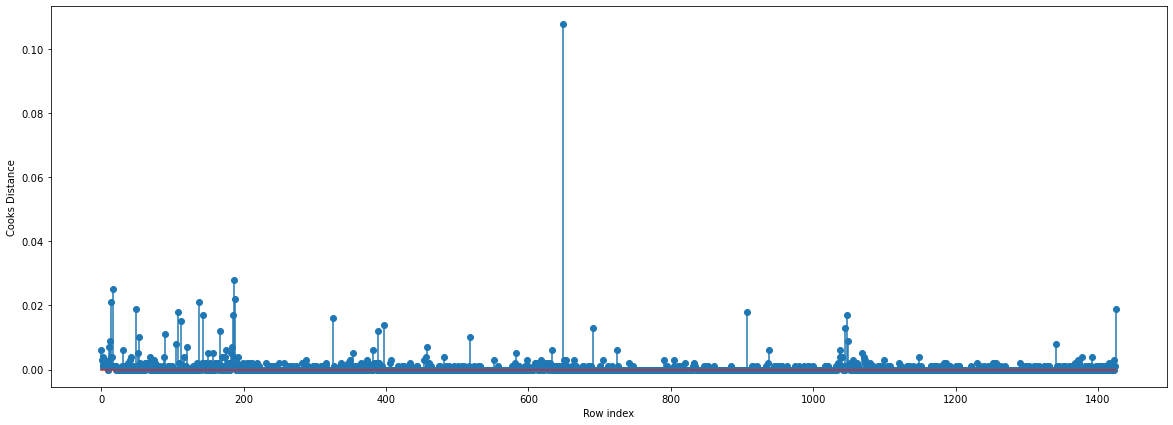

In [169]:
# Plot the influances values using steam plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data3)), np.round(c_V, 3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [170]:
(np.argmax(c_V), np.max(c_V))

(648, 0.10760329701013373)

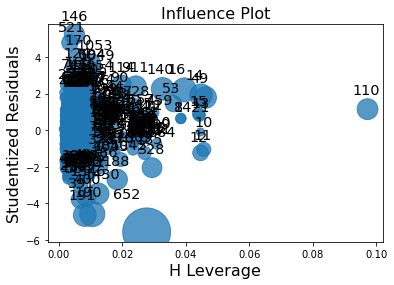

In [171]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model6)
plt.show()

In [172]:
data4 = data3.drop(data3.index[[110,648,146,652]], axis=0).reset_index()

In [173]:
#Exclude variable "Quarterly_Tax" and generate R-Squared and AIC values
model7 = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Weight", data = data4).fit()

In [174]:
model7.rsquared,model7.aic

(0.8851352446339048, 24195.12827056646)

In [175]:
# Cooks distance
model_influance_V = model7.get_influence()
(c_V, _) = model_influance_V.cooks_distance

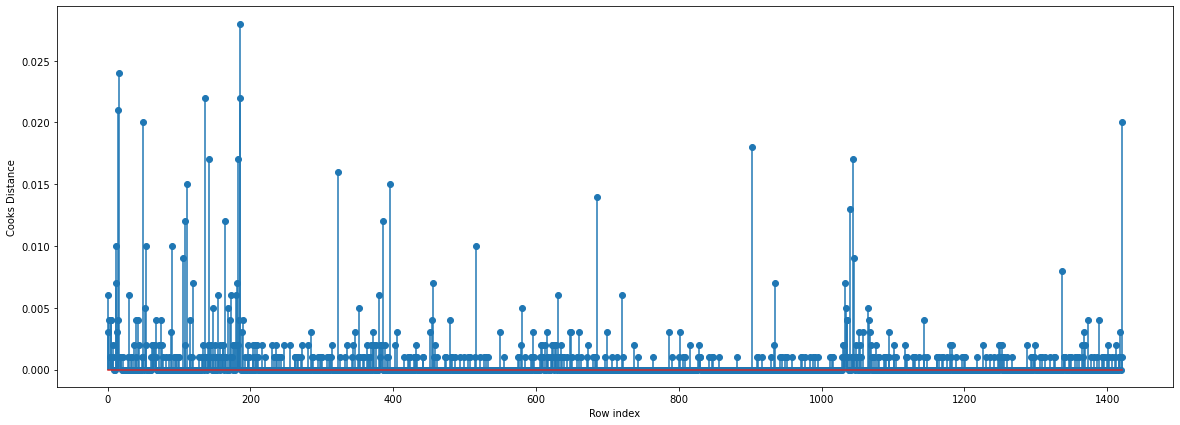

In [176]:
# Plot the influances values using steam plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data4)), np.round(c_V, 3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

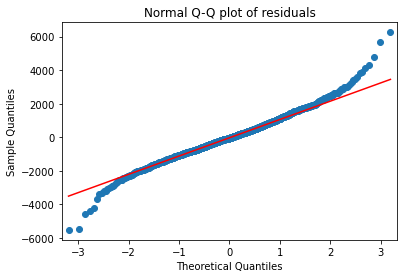

In [177]:
import statsmodels.api as sm
qqplot = sm.qqplot(model7.resid,line='q') # line = 45 to draw the diagonal line
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [183]:
temp1 = list(np.where(model.resid>4000))
temp1

[array([ 109,  110,  111,  125,  147,  171,  523, 1058], dtype=int64)]

In [179]:
list(np.where(model.resid<-4000))

[array([191, 192, 221, 393, 402, 601, 654, 960], dtype=int64)]

In [181]:
data4.shape

(1422, 10)

In [184]:
data5 = data4.drop(data4.index[[109,  110,  111,  125,  147,  171,  523, 1058,191, 192, 221,393, 402, 601, 654, 960]], axis=0).reset_index()

In [185]:
# improving model 
#Exclude variable "Quarterly_Tax" and generate R-Squared and AIC values
model8 = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Weight", data = data5).fit()

In [186]:
model8.rsquared,model8.aic

(0.8807688314570514, 23923.805150730244)

In [187]:
# Cooks distance
model_influance_V = model8.get_influence()
(c_V, _) = model_influance_V.cooks_distance

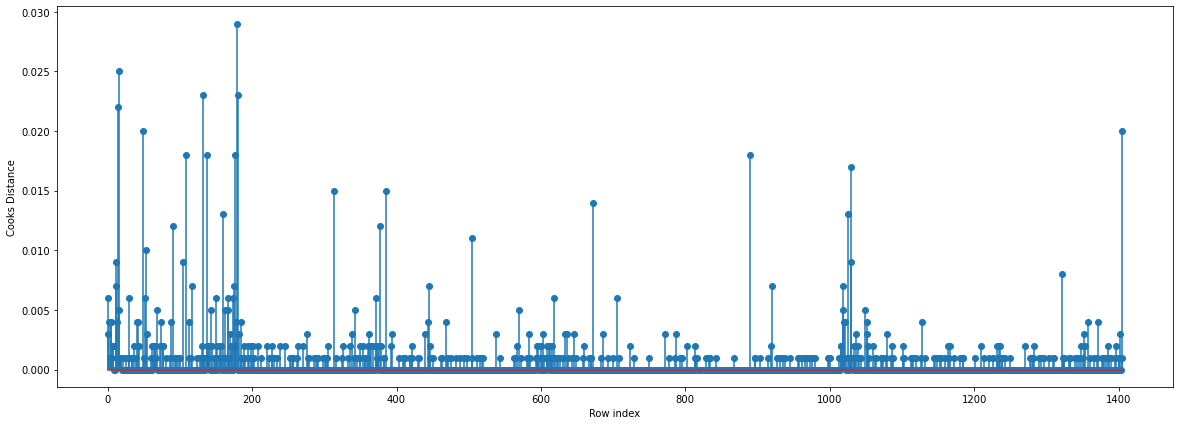

In [188]:
# Plot the influances values using steam plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data5)), np.round(c_V, 3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

# Now Prediction for new data

In [191]:
# Create new dataframe for predection
new_data = pd.DataFrame({'Age_08_04':23,'KM':46986,'HP':90,'cc':2000,'Doors':3,'Gears':5,'Weight':1165}, index=[1])

In [193]:
model8.predict(new_data)

1    16177.274114
dtype: float64

In [197]:
def pred(age,km,hp,cc,doors,gears,waight):
    new_data = pd.DataFrame({'Age_08_04':age,'KM':km,'HP':hp,'cc':cc,'Doors':doors,'Gears':gears,'Weight':waight}, index=[1])
    print("Prediction :", model8.predict(new_data))
    

In [198]:
# Enter data in that sequence (age,km,hp,cc,doors,gears,waight)

pred(23,46986,90,2000,3,5,1165)


Prediction : 1    16177.274114
dtype: float64


In [199]:
d2 = {'Model':['model','model2','model3','model4','model5','model6','model7','model8'],'R_Sqr':['0.864','0.8394508024403655','0.8656883979875688','0.8398500098498799','0.8846845073364402','0.884201685099133','0.8851352446339048','0.8807688314570514']}
models = pd.DataFrame(d2)  
models

,Model,R_Sqr
0,model,0.864
1,model2,0.8394508024403655
2,model3,0.8656883979875688
3,model4,0.8398500098498799
4,model5,0.8846845073364402
5,model6,0.884201685099133
6,model7,0.8851352446339048
7,model8,0.8807688314570514
